<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 1: طبقه بندی با شبکه های تمام متصل روی مجموعه داده IRIS</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
در اولین جلسه کارگاه طبقه بندی با شبکه های تمام متصل را دیدیم.
<br>
توصیه می‌شود حتما نوت بوک‌های زیر را قبل از این تمرین مرور کنید:
</div>

[04_a Gentle Introduction to Keras - Simple neural network(mlp).ipynb](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/04_a%20Gentle%20Introduction%20to%20Keras%20-%20Simple%20neural%20network%28mlp%29.ipynb)

[05_Dropout.ipynb](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/05_Dropout.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این جلسه با داده های تصویری آشنا شدیم. اما در این تمرین برای اینکه بدانیم کاربرد این مباحث در مسائل غیر تصویری نیز هست  از مجموعه داده ی ساختار یافتهiris  شامل 4 ویژگی برای طول و عرض کاسبرگ و گلبرگ استفاده خواهیم کرد که بتوانیم بر اساس این ویژگی ها نوع گل را از 3 کلاس متفاوت تشخیص دهیم.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [1]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین میخواهیم از مجموعه داده iris استفاده کنیم.
<br>
توضیحات این مجموعه داده در سایت آن موجود است:
</div>

https://archive.ics.uci.edu/ml/datasets/iris


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ویژگی ها و کلاس های این مجموعه داده به شرح زیر است:
</div>

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

class:

    Iris Setosa
    Iris Versicolour
    Iris Virginica

<div style="direction:rtl;text-align:right;font-family:Tahoma">
این دیتاست در کتابخانه sklearn موجود است
<br>
در قطعه کد زیر ویژگی ها را در x و برچسب یا labelهای متناظر را در y لود شده است.
</div>

In [2]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
برچسب یا label های ما در حال حاضر عددی است.
<br>
این اعداد 0 تا 2 هستند و به عبارتی 3 حالت مختلف دارند.
<br>
این برچسب ها را به فرمت one-hot تبدیل کنید و خروجی را مجدد در y بریزید.

<br>
<b>راهنمایی: </b>
از تابع keras.utils.to_categorical استفاده کنید.
</div>

In [3]:
y=keras.utils.to_categorical(y, num_classes=3)


In [ ]:
y.shape

(150, 3)

In [ ]:
y[:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر داده ها  به داده های test و train تقسیم شده است:
</div>

In [4]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه با دو hidden-layer در هر لایه 10 نوران و تابع فعالیت relu بسازید. یک لایه Dropout با نرخ 0.5 در لایه آخر ماقبل softmax نیز اضافه کنید.
</div>

In [5]:
# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=train_x.shape[-1]))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_y.shape[-1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div style="direction:rtl;text-align:right;font-family:Tahoma">در زیر مدل کامپایل شده است.</div>

In [9]:
# Adam optimizer with learning rate of 0.001
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile( loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را با  batch_size=5 و تعداد 200 ایپاک آموزش دهید.
<br>
<b>راهنمایی: </b>
از تابع model.fit استفاده کنید.
</div>

In [10]:
# Train the model
history = model.fit(train_x, train_y,
          batch_size=64,epochs=200,
           validation_data=(test_x, test_y))

Epoch 1/200
2/2 [==============================] - 1s 171ms/step - loss: 0.5432 - accuracy: 0.6750 - val_loss: 0.1176 - val_accuracy: 1.0000
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 0.5272 - accuracy: 0.7333 - val_loss: 0.1178 - val_accuracy: 1.0000
Epoch 3/200
2/2 [==============================] - 0s 49ms/step - loss: 0.4420 - accuracy: 0.7583 - val_loss: 0.1183 - val_accuracy: 1.0000
Epoch 4/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4775 - accuracy: 0.7417 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4910 - accuracy: 0.7417 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4740 - accuracy: 0.7500 - val_loss: 0.1183 - val_accuracy: 1.0000
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 0.4456 - accuracy: 0.7500 - val_loss: 0.1182 - val_accuracy: 1.0000
Epoch 8/200
2/2 [==

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را روی داده های test ارزیابی کنید.
<br>
<b>راهنمایی: </b>
از تابع model.evaluate استفاده کنید.
</div>

In [ ]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 134ms/step - loss: 0.2813 - accuracy: 1.0000
Final test set loss: 0.281295
Final test set accuracy: 1.000000


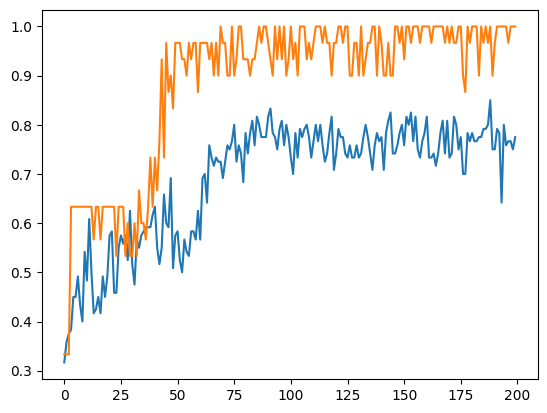

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])